# 🤖 Bertopic with abstracts of *Biology and Philosophy* 

In [162]:
#Directories
DATA_PHILO = "C:/Users/jacob/OneDrive - Université Laval/biophilo/Data/pybiblio/SPECIALIZED PHILOSOPHY OF BIOLOGY/articles_special_philo_bio_reformat.csv"

PATH_TO_VIZ = r"C:/Users/jacob/OneDrive - Université Laval/biophilo/Visualisation"

# Packages to import. 
import pandas as pd 
import numpy as np
import datamapplot

from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

## 📄 Data
This data is from Philosophy of Biology journal from 1986 to 2024. I removed all the entries with no abstract. 


In [163]:
df = pd.read_csv("C:/Users/jacob/OneDrive - Université Laval/biophilo/Data/pybiblio/SPECIALIZED PHILOSOPHY OF BIOLOGY/articles_special_philo_bio_reformat.csv")
df = df.fillna("NULL")
df

...1    citing_id                  citing_doi   pii pubmed_id  \
0        0  85214130018  10.1007/S10539-024-09975-9  NULL      NULL   
1        1  85213705399  10.1007/S10539-024-09978-6  NULL      NULL   
2        2  85213504854  10.1007/S10539-024-09977-7  NULL      NULL   
3        3  85212923885  10.1007/S10539-024-09976-8  NULL      NULL   
4        4  85211818588  10.1007/S10539-024-09974-W  NULL      NULL   
...    ...          ...                         ...   ...       ...   
4282    59  51649148197          10.1007/BF02423834  NULL      NULL   
4283    60  51249172897          10.1007/BF02423832  NULL      NULL   
4284    61  51249171339          10.1007/BF02423831  NULL      NULL   
4285    62   2342585303          10.1007/BF02426629  NULL      NULL   
4286    63      2459750          10.1007/BF02426630  NULL      NULL   

                                           citing_title subtype  \
0     INTERVENTIONISM AS A DANGEROUSLY ANTHROPOCENTR...      AR   
1     DEFENDING THE IMPORTANCE OF LINEAGE-FORMING RE...      AR   
2     THE GRADATIONAL NATURE OF BIOLOGICAL FUNCTIONS...      AR   
3     CORRECTION TO: A CO-CONSTITUTIVE ANALYSIS OF I...      ER   
4     CORRECTION TO: CULTURAL INTELLIGENCE, SHARED I...      ER   
...                                                 ...     ...   
4282  MARXISM AND HUMAN SOCIOBIOLOGY: A REPLY TO ZHA...      RE   
4283  SPECIES OF THOUGHT: A COMMENT ON EVOLUTIONARY ...      AR   
4284  MODELING IN THE MUSEUM: ON THE ROLE OF REMNANT...      AR   
4285    DOES EVOLUTIONARY BIOLOGY CONTRIBUTE TO ETHICS?      AR   
4286        THE CRUCIAL EXPERIMENT OF WILHELM JOHANNSEN      AR   

     subtypeDescription         creator                afid  ... pageRange  \
0               ARTICLE     KOPERSKI P.            60110624  ...      NULL   
1               ARTICLE        ZHANG M.            60009860  ...      NULL   
2               ARTICLE       ŠUSTAR P.            60077673  ...      NULL   
3               ERRATUM  MCCONWELL A.K.            60033461  ...      NULL   
4               ERRATUM        KOREŇ L.            60000474  ...      NULL   
...                 ...             ...                 ...  ...       ...   
4282             REVIEW        KEITA L.            60072930  ...     79-83   
4283            ARTICLE       WILSON D.            60020273  ...     37-62   
4284            ARTICLE    GRIESEMER J.            60014439  ...      3-36   
4285            ARTICLE      BATESON P.            60031101  ...   287-301   
4286            ARTICLE  ROLL-HANSEN N.  60010348;100444942  ...   303-329   

                                            description  \
0     The article presents and critically discusses ...   
1     Charbonneau (2014) and Papale (2021) challenge...   
2     In this paper, we consider whether a straightf...   
3     In the sentence beginning “Case 3 Rerun. And f...   
4     Cultural intelligence, shared intentionality a...   
...                                                 ...   
4282                                               NULL   
4283  The primary outcome of natural selection is ad...   
4284  Accounts of the relation between theories and ...   
4285  Human propensities that are the products of Da...   
4286  I call an experiment "crucial" when it makes p...   

                                           authkeywords citedby_count  \
0     ANIMAL SUFFERING | ANTHROPOCENE | ENVIRONMENTA...             0   
1     ECOLOGICAL INHERITANCE | EVOLUTION BY NATURAL ...             0   
2     CAUSAL ROLE | DE NOVO GENES | GENOME BIOLOGY |...             0   
3                                                  NULL             0   
4                                                  NULL             0   
...                                                 ...           ...   
4282  ECONOMIC GROWTH | FREE-MARKET ECONOMIES | MARX...             2   
4283  ADAPTATION | EVOLUTIONARY EPISTEMOLOGY | MENTA...            29   
4284  ECOLOGY | EVOLUTION | JOSEPH GRINNELL |

In [164]:
df_cleaned  = df[df['description'] != 'NULL']
df_cleaned = df_cleaned[df_cleaned['citing_journal']== "BIOLOGY AND PHILOSOPHY"]
df_cleaned  = df_cleaned[df_cleaned['subtypeDescription'] == 'ARTICLE']

df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned


...1    citing_id                  citing_doi   pii pubmed_id  \
0        0  85214130018  10.1007/S10539-024-09975-9  NULL      NULL   
1        1  85213705399  10.1007/S10539-024-09978-6  NULL      NULL   
2        2  85213504854  10.1007/S10539-024-09977-7  NULL      NULL   
3        5  85211778719  10.1007/S10539-024-09972-Y  NULL      NULL   
4        6  85209758913  10.1007/S10539-024-09969-7  NULL      NULL   
...    ...          ...                         ...   ...       ...   
1135    58  51649149432          10.1007/BF02423833  NULL      NULL   
1136    60  51249172897          10.1007/BF02423832  NULL      NULL   
1137    61  51249171339          10.1007/BF02423831  NULL      NULL   
1138    62   2342585303          10.1007/BF02426629  NULL      NULL   
1139    63      2459750          10.1007/BF02426630  NULL      NULL   

                                           citing_title subtype  \
0     INTERVENTIONISM AS A DANGEROUSLY ANTHROPOCENTR...      AR   
1     DEFENDING THE IMPORTANCE OF LINEAGE-FORMING RE...      AR   
2     THE GRADATIONAL NATURE OF BIOLOGICAL FUNCTIONS...      AR   
3                                     SEX ELIMINATIVISM      AR   
4     THRESHOLDS OF HUMAN COOPERATION: CONSTRUCTING ...      AR   
...                                                 ...     ...   
1135                        CAN ABSTRACTIONS BE CAUSES?      AR   
1136  SPECIES OF THOUGHT: A COMMENT ON EVOLUTIONARY ...      AR   
1137  MODELING IN THE MUSEUM: ON THE ROLE OF REMNANT...      AR   
1138    DOES EVOLUTIONARY BIOLOGY CONTRIBUTE TO ETHICS?      AR   
1139        THE CRUCIAL EXPERIMENT OF WILHELM JOHANNSEN      AR   

     subtypeDescription              creator                afid  ...  \
0               ARTICLE          KOPERSKI P.            60110624  ...   
1               ARTICLE             ZHANG M.            60009860  ...   
2               ARTICLE            ŠUSTAR P.            60077673  ...   
3               ARTICLE           WATKINS A.   60032179;60010261  ...   
4               ARTICLE  GONZALEZ-CABRERA I.            60025525  ...   
...                 ...                  ...                 ...  ...   
1135            ARTICLE         JOHNSON D.M.            60033420  ...   
1136            ARTICLE            WILSON D.            60020273  ...   
1137            ARTICLE         GRIESEMER J.            60014439  ...   
1138            ARTICLE           BATESON P.            60031101  ...   
1139            ARTICLE       ROLL-HANSEN N.  60010348;100444942  ...   

     pageRange                                        description  \
0         NULL  The article presents and critically discusses ...   
1         NULL  Charbonneau (2014) and Papale (2021) challenge...   
2         NULL  In this paper, we consider whether a straightf...   
3         NULL  The concept of biological sex guides research,...   
4         NULL  Shared intentionality is key for understanding...   
...        ...                                                ...   
1135     63-77  The Empiricist or Lockean view says natural ki...   
1136     37-62  The primary outcome of natural selection is ad...   
1137      3-36  Accounts of the relation between theories and ...   
1138   287-301  Human propensities that are the products of Da...   
1139   303-329  I call an experiment "crucial" when it makes p...   

                                           authkeywords citedby_count  \
0     ANIMAL SUFFERING | ANTHROPOCENE | ENVIRONMENTA...             0   
1     ECOLOGICAL INHERITANCE | EVOLUTION BY NATURAL ...             0   
2     CAUSAL ROLE | DE NOVO GENES | GENOME BIOLOGY |...             0   
3     ANTIREALISM | BIOLOGICAL SEX | SEX CONTEXTUALI...             0   
4     COGNITIVE EVOLUTION | COOPERATIVE BREEDING | D...             0   
...                                                 ...           ...   
1135  ABSTRACTIONS | CAUSALITY | ECOLOGICAL NICHES |...            11   
1136  ADAPTATION | EVOLUTIONARY EPISTEMOLOGY | MENTA...   

In [165]:
docs = df_cleaned.description.to_list()  
columns_to_combine = ['creator', 'citing_year', 'citing_title']
df_cleaned['combined'] = df_cleaned[columns_to_combine].apply(lambda row: ', '.join(map(str, row)), axis=1)
node_text = df_cleaned.combined.to_list()

## 🌌 BERTopic model

In [166]:
# Pre-calculate embeddings
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

# Pre-reduce embeddings for visualization purposes
reduced_embeddings = UMAP(n_neighbors=15, n_components= 2, min_dist=0.0, metric='cosine', random_state=30).fit_transform(embeddings)

Batches:   0%|          | 0/36 [00:00<?, ?it/s]

### Clustering with HDBSCAN

In [167]:
# Define sub-models
from hdbscan import HDBSCAN
from umap import UMAP
umap_model = UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine', random_state=30)
hdbscan_model = HDBSCAN(min_cluster_size=12, metric='euclidean', cluster_selection_method='eom', prediction_data=True)


### Clustering with K-Means

In [168]:
from sklearn.cluster import KMeans
cluster_model = KMeans(n_clusters=5)

## BERTopic Model

In [169]:
# Define a custom list of stopwords (or use an extended one)
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words="english")

topic_model = BERTopic(
  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  
  #representation_model=representation_model,
  vectorizer_model=vectorizer_model,
  
  # Hyperparameters
  top_n_words=10,
  verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(docs, embeddings)


topic_model_extended = topic_model # This will be useful to compare our first model to our second one. 

2025-04-27 17:20:42,098 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-27 17:20:44,859 - BERTopic - Dimensionality - Completed ✓
2025-04-27 17:20:44,860 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-27 17:20:44,887 - BERTopic - Cluster - Completed ✓
2025-04-27 17:20:44,891 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-04-27 17:20:45,039 - BERTopic - Representation - Completed ✓


## Visualisation of Clusters 

In [170]:
#topic_model = topic_model_extended

In [171]:
# Count how many are labeled -1 (outliers)
topic_info = topic_model.get_topic_info()
outlier_count = topic_info[topic_info['Topic'] == -1]['Count'].values[0]
print(f"Number of outliers: {outlier_count}")

Number of outliers: 377


In [172]:
topic_model.visualize_heatmap()

This is indeed a lot of topics. Lets see if we can merge some of them. 

In [173]:
topic_model.visualize_topics()

In [174]:
# Extract hierarchical topics and their representations
hierarchical_topics = topic_model.hierarchical_topics(docs)

# Visualize these representations
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 18/18 [00:00<00:00, 197.87it/s]


In [175]:
topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, embeddings=embeddings)

## Merging Clusters

In [176]:
topic_model.visualize_barchart(top_n_topics= 70,)


In [177]:
topic_info = topic_model.get_topic_info()
topic_info

Topic  Count                                             Name  \
0      -1    377         -1_evolutionary_biological_argue_biology   
1       0    114         0_fitness_selection_evolutionary_natural   
2       1     80            1_brain_cognitive_information_content   
3       2     73                    2_moral_morality_social_norms   
4       3     65          3_species_concept_phylogenetic_homology   
5       4     54            4_explanations_causal_ultimate_causes   
6       5     53                5_niche_ecology_ecological_models   
7       6     41                    6_tree_life_microbial_lateral   
8       7     33  7_biodiversity_conservation_invasion_extinction   
9       8     28   8_cooperation_cooperative_evolution_punishment   
10      9     28                  9_animals_animal_behaviour_self   
11     10     27       10_language_linguistic_communication_human   
12     11     27                 11_laws_biology_integration_cell   
13     12     25              12_systems_self_organization_energy   
14     13     24                       13_gene_genome_dna_genetic   
15     14     23       14_cultural_transmission_culture_evolution   
16     15     20     15_evolutionary_biology_developmental_modern   
17     16     18       16_functions_function_etiological_selected   
18     17     16          17_science_research_evidence_empiricist   
19     18     14                    18_fossils_fossil_data_living   

                                       Representation  \
0   [evolutionary, biological, argue, biology, evo...   
1   [fitness, selection, evolutionary, natural, th...   
2   [brain, cognitive, information, content, cogni...   
3   [moral, morality, social, norms, ethics, human...   
4   [species, concept, phylogenetic, homology, tax...   
5   [explanations, causal, ultimate, causes, causa...   
6   [niche, ecology, ecological, models, construct...   
7   [tree, life, microbial, lateral, transfer, com...   
8   [biodiversity, conservation, invasion, extinct...   
9   [cooperation, cooperative, evolution, punishme...   
10  [animals, animal, behaviour, self, human, cogn...   
11  [language, linguistic, communication, human, e...   
12  [laws, biology, integration, cell, model, deve...   
13  [systems, self, organization, energy, informat...   
14  [gene, genome, dna, genetic, genes, junk, code...   
15  [cultural, transmission, culture, evolution, s...   
16  [evolutionary, biology, developmental, modern,...   
17  [functions, function, etiological, selected, t...   
18  [science, research, evidence, empiricist, scie...   
19  [fossils, fossil, data, living, historical, sc...   

                                  Representative_Docs  
0   [Cooperation is rife in the microbial world, y...  
1   [On the basis of distinctions between those pr...  
2   [The brain is often taken to be a paradigmatic...  
3   [Empirical studies of the social lives of non-...  
4   [A natural starting place for developing a phy...  
5   [Proximate and ultimate causes in evolutionary...  
6   [Research in evolutionary biology and philosop...  
7   [Ernst Mayr's influence on philosophy of biolo...  
8   [Recent work in the philosophy of biology has ...  
9   [It is widely agreed that humans have specific...  
10  [Knowledge of one's own states of mind is one ...  
11  [Recent discussions of animal communication an...  
12  [Rosenberg has recently argued that explanatio...  
13  [Integrating concepts of maintenance and of or...  
14  [In its last round of publications in Septembe...  
15  [This discussion paper responds to two recent ...  
16  [The model of major transitions in evolution (...  
17  [Cancer biology features the ascription of nor...  
18  [Several have argued that the aims of scientif...  
19  [“Ancient DNA Research” is the practice of ext...

In [178]:
# Test
labels_claude = [
    "Unlabelled",
    "Evolutionary Theory",  # Topic 0: Evolutionary Theory
    "Cognitive Science",  # Topic 1: Cognitive Science and Philosophy
    "Ethics and Moral Philosophy",  # Topic 2: Moral and Ethical Philosophy
    "Taxonomy and Evolution",  # Topic 3: Biological Classification and Taxonomy
    "Ecology",  # Topic 4: Ecology and Environmental Philosophy
    "Microbiology",  # Topic 5: Life and Biodiversity
    "Biodiversity and Conservation",  # Topic 6: Biodiversity and Conservation Philosophy
    "Language and Human Evolution",  # Topic 7: Human and Evolutionary Philosophy
    "Animal Behavior",  # Topic 8: Animal Behavior and Ethics
    "Cultural Evolution",  # Topic 10: Cultural Evolution
    "Genetics",  # Topic 9: Genetics and Biological Philosophy
    "Functions and Evolution",  # Topic 11: Function and Etiology in Biology
    "Biological Functions"  # Topic 12: Biological Function and Theory
]



len(labels_claude)

14

In [191]:
labels_claude = [
    "Unlabelled",
   "Fitness Selection Theory",
   "Brain Cognitive Information",
   "Moral Social Ethics",
   "Species Phylogenetic Taxonomy",
   "Causal Explanations",
   "Ecological Niche Construction",
   "Microbial Tree Transfer",
   "Biodiversity Conservation",
   "Cooperation Reciprocity",
   "Animal Behavior Self",
   "Language Communication Evolution",
   "Biological Laws Integration",
   "Systems Self-Organization",
   "Gene Genome Analysis",
   "Cultural Transmission Evolution",
   "Evolutionary Developmental Biology",
   "Functions Etiological Theory",
   "Scientific Empiricist Research",
   "Fossil Historical Data"
]
len(labels_claude)

20

In [192]:
topic_info['Name_Claude'] = labels_claude
topic_name = topic_info[["Name", "Name_Claude"]]
topics_docs = topic_model.get_document_info(docs)
topics_docs


Document  Topic  \
0     The article presents and critically discusses ...      7   
1     Charbonneau (2014) and Papale (2021) challenge...     -1   
2     In this paper, we consider whether a straightf...     13   
3     The concept of biological sex guides research,...     -1   
4     Shared intentionality is key for understanding...     -1   
...                                                 ...    ...   
1135  The Empiricist or Lockean view says natural ki...      3   
1136  The primary outcome of natural selection is ad...     -1   
1137  Accounts of the relation between theories and ...      5   
1138  Human propensities that are the products of Da...      2   
1139  I call an experiment "crucial" when it makes p...     17   

                                                 Name  \
0     7_biodiversity_conservation_invasion_extinction   
1            -1_evolutionary_biological_argue_biology   
2                          13_gene_genome_dna_genetic   
3            -1_evolutionary_biological_argue_biology   
4            -1_evolutionary_biological_argue_biology   
...                                               ...   
1135          3_species_concept_phylogenetic_homology   
1136         -1_evolutionary_biological_argue_biology   
1137                5_niche_ecology_ecological_models   
1138                    2_moral_morality_social_norms   
1139          17_science_research_evidence_empiricist   

                                         Representation  \
0     [biodiversity, conservation, invasion, extinct...   
1     [evolutionary, biological, argue, biology, evo...   
2     [gene, genome, dna, genetic, genes, junk, code...   
3     [evolutionary, biological, argue, biology, evo...   
4     [evolutionary, biological, argue, biology, evo...   
...                                                 ...   
1135  [species, concept, phylogenetic, homology, tax...   
1136  [evolutionary, biological, argue, biology, evo...   
1137  [niche, ecology, ecological, models, construct...   
1138  [moral, morality, social, norms, ethics, human...   
1139  [science, research, evidence, empiricist, scie...   

                                    Representative_Docs  \
0     [Recent work in the philosophy of biology has ...   
1     [Cooperation is rife in the microbial world, y...   
2     [In its last round of publications in Septembe...   
3     [Cooperation is rife in the microbial world, y...   
4     [Cooperation is rife in the microbial world, y...   
...                                                 ...   
1135  [A natural starting place for developing a phy...   
1136  [Cooperation is rife in the microbial world, y...   
1137  [Research in evolutionary biology and philosop...   
1138  [Empirical studies of the social lives of non-...   
1139  [Several have argued that the aims of scientif...   

                                            Top_n_words  Probability  \
0     biodiversity - conservation - invasion - extin...     0.420154   
1     evolutionary - biological - argue - biology - ...     0.000000   
2     gene - genome - dna - genetic - genes - junk -...     0.820358   
3     evolutionary - biological - argue - biology - ...     0.000000   
4     evolutionary - biological - argue - biology - ...     0.000000   
...                                                 ...          ...   
1135  species - concept - phylogenetic - homology - ...     0.386127   
1136  evolutionary - biological - argue - biology - ...     0.000000   
1137  niche - ecology - ecological - models - constr...     1.000000   
1138  moral - morality - social - norms - ethics - h...     0.574640   
1139  science - research - evidence - empiricist - s...     0.960570   

      Representative_document  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False  
...                       ...  
1135                    False  
1136                    False 

In [193]:
final_labels = pd.merge(topics_docs, topic_name, on='Name', how='left')
final_labels_legend = final_labels
final_labels = pd.array(final_labels.Name_Claude)
final_labels
topic_info

Topic  Count                                             Name  \
0      -1    377         -1_evolutionary_biological_argue_biology   
1       0    114         0_fitness_selection_evolutionary_natural   
2       1     80            1_brain_cognitive_information_content   
3       2     73                    2_moral_morality_social_norms   
4       3     65          3_species_concept_phylogenetic_homology   
5       4     54            4_explanations_causal_ultimate_causes   
6       5     53                5_niche_ecology_ecological_models   
7       6     41                    6_tree_life_microbial_lateral   
8       7     33  7_biodiversity_conservation_invasion_extinction   
9       8     28   8_cooperation_cooperative_evolution_punishment   
10      9     28                  9_animals_animal_behaviour_self   
11     10     27       10_language_linguistic_communication_human   
12     11     27                 11_laws_biology_integration_cell   
13     12     25              12_systems_self_organization_energy   
14     13     24                       13_gene_genome_dna_genetic   
15     14     23       14_cultural_transmission_culture_evolution   
16     15     20     15_evolutionary_biology_developmental_modern   
17     16     18       16_functions_function_etiological_selected   
18     17     16          17_science_research_evidence_empiricist   
19     18     14                    18_fossils_fossil_data_living   

                                       Representation  \
0   [evolutionary, biological, argue, biology, evo...   
1   [fitness, selection, evolutionary, natural, th...   
2   [brain, cognitive, information, content, cogni...   
3   [moral, morality, social, norms, ethics, human...   
4   [species, concept, phylogenetic, homology, tax...   
5   [explanations, causal, ultimate, causes, causa...   
6   [niche, ecology, ecological, models, construct...   
7   [tree, life, microbial, lateral, transfer, com...   
8   [biodiversity, conservation, invasion, extinct...   
9   [cooperation, cooperative, evolution, punishme...   
10  [animals, animal, behaviour, self, human, cogn...   
11  [language, linguistic, communication, human, e...   
12  [laws, biology, integration, cell, model, deve...   
13  [systems, self, organization, energy, informat...   
14  [gene, genome, dna, genetic, genes, junk, code...   
15  [cultural, transmission, culture, evolution, s...   
16  [evolutionary, biology, developmental, modern,...   
17  [functions, function, etiological, selected, t...   
18  [science, research, evidence, empiricist, scie...   
19  [fossils, fossil, data, living, historical, sc...   

                                  Representative_Docs  \
0   [Cooperation is rife in the microbial world, y...   
1   [On the basis of distinctions between those pr...   
2   [The brain is often taken to be a paradigmatic...   
3   [Empirical studies of the social lives of non-...   
4   [A natural starting place for developing a phy...   
5   [Proximate and ultimate causes in evolutionary...   
6   [Research in evolutionary biology and philosop...   
7   [Ernst Mayr's influence on philosophy of biolo...   
8   [Recent work in the philosophy of biology has ...   
9   [It is widely agreed that humans have specific...   
10  [Knowledge of one's own states of mind is one ...   
11  [Recent discussions of animal communication an...   
12  [Rosenberg has recently argued that explanatio...   
13  [Integrating concepts of maintenance and of or...   
14  [In its last round of publications in Septembe...   
15  [This discussion paper responds to two recent ...   
16  [The model of major transitions in evolution (...   
17  [Cancer biology features the ascription of nor...   
18  [Several have argued that the aims of scientif...   
19  [“Ancient DNA Research” is the practice of ext...   

                           Name_Claude  
0                           Unlabelled  
1             Fitness Selection Theory  
2          Brain Cognitive Informat

In [194]:
# Test
x = topic_model.get_document_info(docs)
y = x.Name
labels =y.values
labels.shape
labels

topic_info = topic_model.get_topic_info()
excluded_topic = str(topic_info.Name[0]) 
clean_labels= [item.replace(excluded_topic, "Unlabelled") for item in labels] # To exclude -1 topic which is typically noise. 
clean_labels

['7_biodiversity_conservation_invasion_extinction',
 'Unlabelled',
 '13_gene_genome_dna_genetic',
 'Unlabelled',
 'Unlabelled',
 '7_biodiversity_conservation_invasion_extinction',
 '1_brain_cognitive_information_content',
 'Unlabelled',
 '5_niche_ecology_ecological_models',
 'Unlabelled',
 'Unlabelled',
 'Unlabelled',
 '7_biodiversity_conservation_invasion_extinction',
 '0_fitness_selection_evolutionary_natural',
 '18_fossils_fossil_data_living',
 '11_laws_biology_integration_cell',
 'Unlabelled',
 '15_evolutionary_biology_developmental_modern',
 '2_moral_morality_social_norms',
 'Unlabelled',
 'Unlabelled',
 'Unlabelled',
 '0_fitness_selection_evolutionary_natural',
 'Unlabelled',
 '10_language_linguistic_communication_human',
 '0_fitness_selection_evolutionary_natural',
 'Unlabelled',
 'Unlabelled',
 '5_niche_ecology_ecological_models',
 'Unlabelled',
 '0_fitness_selection_evolutionary_natural',
 '16_functions_function_etiological_selected',
 '12_systems_self_organization_energy',
 '

## Visualisation 

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'left': 'HDBSCAN clustering, Claude 3.7 Sonnet'}>)

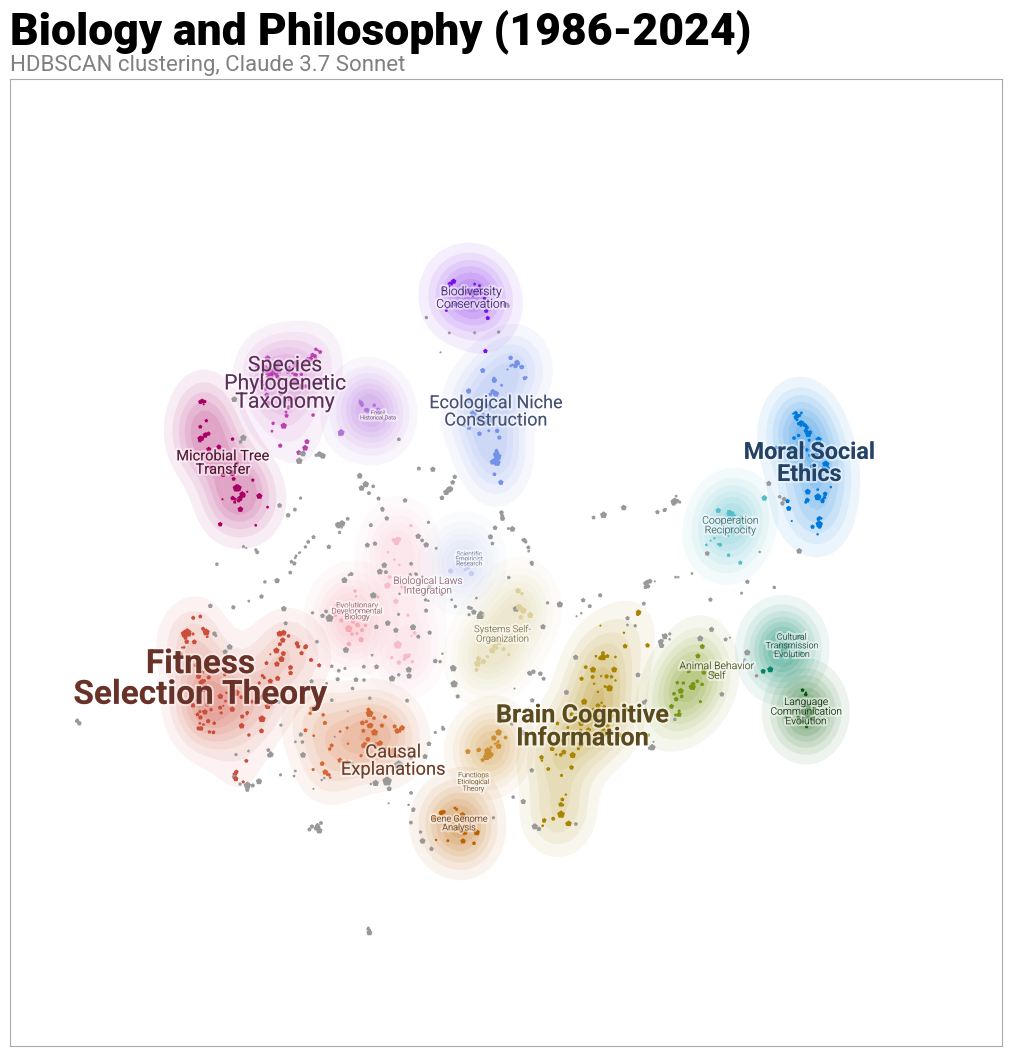

In [195]:
datamapplot.create_plot(
    reduced_embeddings,
    final_labels,
    color_label_arrows = True,
    label_over_points=True, 
    dynamic_label_size=True,
    title = f"Biology and Philosophy (1986-2024)",
    sub_title= f"HDBSCAN clustering, Claude 3.7 Sonnet",
    point_size=3, 
    marker_type="p", 
    marker_size_array=np.sqrt(df_cleaned.citedby_count), 
    force_matplotlib=True
    )

The code below is to add additional information like the citation count of each papers and also their keywords.

For more informations about how to integrate and style this information, consult https://datamapplot.readthedocs.io/en/latest/ and the according *Github*.

In [184]:
add_info = pd.DataFrame(
    {"citedby_count":df_cleaned.citedby_count, "keywords":df_cleaned.authkeywords.fillna('No_value')}
)

marker_size_array = np.log(1 + df_cleaned.citedby_count.values) # log for visibility
add_info

citedby_count                                           keywords
0                 0  ANIMAL SUFFERING | ANTHROPOCENE | ENVIRONMENTA...
1                 0  ECOLOGICAL INHERITANCE | EVOLUTION BY NATURAL ...
2                 0  CAUSAL ROLE | DE NOVO GENES | GENOME BIOLOGY |...
3                 0  ANTIREALISM | BIOLOGICAL SEX | SEX CONTEXTUALI...
4                 0  COGNITIVE EVOLUTION | COOPERATIVE BREEDING | D...
...             ...                                                ...
1135             11  ABSTRACTIONS | CAUSALITY | ECOLOGICAL NICHES |...
1136             29  ADAPTATION | EVOLUTIONARY EPISTEMOLOGY | MENTA...
1137             44  ECOLOGY | EVOLUTION | JOSEPH GRINNELL | MATERI...
1138              8  BEHAVIORAL DEVELOPMENT | ETHICS | EVOLUTION | ...
1139             31  BIOMETRICIANS | CRUCIAL EXPERIMENT | GENETICS ...

[1140 rows x 2 columns]

In [185]:
hover_text_template = """
<div>
    <p> <strong> Title </strong>: {hover_text}</p>
    <p> <strong> Citation Count </strong>: {citedby_count}</p>
    <p> <strong> Keywords </strong>: {keywords}</p>
</div>
</div>
"""
badge_css = """
    border-radius:6px; 
    width:fit-content; 
    max-width:75%; 
    margin:2px; 
    padding: 2px 10px 2px 10px; 
    font-size: 10pt;
"""
hover_text_template = f"""
<div>
    <div style="font-size:12pt;padding:2px;">{{hover_text}}</div>
    <div style="background-color:#525356;color:#fff;{badge_css}">{{keywords}}</div>
    <div style="background-color:#eeeeeeff;{badge_css}">Citation count: {{citedby_count}}</div>
</div>
""" 



<InteractiveFigure width=100% height=800>
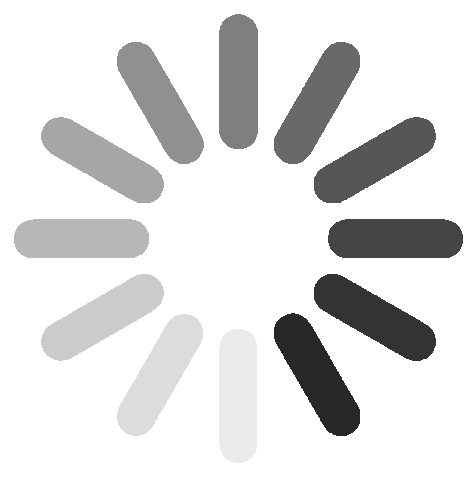

In [187]:
import datamapplot.selection_handlers
import glasbey
palette = glasbey.create_palette(20, chroma_bounds=(20,75), lightness_bounds=(20,60))

plot = datamapplot.create_interactive_plot(
    reduced_embeddings,
    clean_labels,
    hover_text= node_text,
    font_family="Cinzel",
    enable_search=True,
    #inline_data=False,
    initial_zoom_fraction=0.9,
    #offline_data_prefix="cord-large-cmaps-1",
    extra_point_data= add_info,
    hover_text_html_template = hover_text_template,
    marker_size_array=marker_size_array,
    selection_handler=datamapplot.selection_handlers.DisplaySample(n_samples=25),
    #colormaps={"Type": df_cleaned.subtypeDescription, "Journal": df_cleaned.citing_journal, "Theme": final_labels_legend.Name_claude},
    colormap_rawdata=[df_cleaned.subtypeDescription, df_cleaned.citing_journal], #final_labels_legend.Name_Claude],
    colormap_metadata=[
        {"field": "Type", "description": "Type", "cmap": "Accent", "kind": "datetime"},
        {"field": "Journal", "description": "Journal", "cmap": "Dark2_r", "kind": "continuous"},
        {"field": "Theme", "description": "Theme", "palette": palette, "kind": "categorical", "n_colors": 29},
    ],
    offline_mode=True
)
plot

In [ ]:
plot.save("C:/Users/jacob/OneDrive - Université Laval/biophilo/Visualisation/BERTopic_biology_and_philosophy.html")

# Percent Table

In [198]:
topic_info[['Name_Claude', 'Count']]
topic_info = topic_info[topic_info['Name_Claude'] != 'Unlabelled']


KeyError: "['Name_Claude'] not in index"

In [196]:
table_topic = topic_info[['Name_Claude', 'Count']]
table_topic['percent'] = (table_topic['Count'] / table_topic['Count'].sum()) * 100
print(table_topic)

KeyError: "['Name_Claude'] not in index"